<a href="https://colab.research.google.com/github/ayansengupta17/sequences_with_tf2/blob/main/sequences_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [16]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return time*slope

def seasonal_pattern(season_time):
    return np.where(season_time<0.4,
                    np.cos(season_time*2*np.pi),
                    1 / np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) /period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


def autocorrelation_1(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    phi_1 = 0.5
    phi_2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time)+50):
        ar[step] +=phi_1*ar[step - 50]
        ar[step] +=phi_2*ar[step - 33]

    return ar[50:]*amplitude

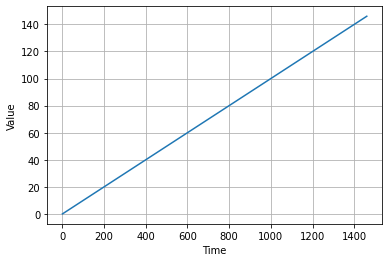

In [6]:
time = np.arange(4*365 + 1, dtype="float32")

series = trend(time, 0.1)
plot_series(time, series)
plt.show()

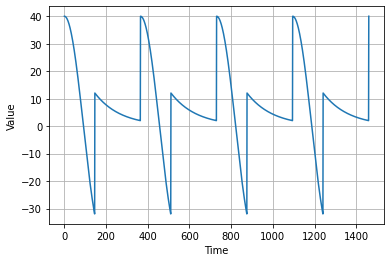

In [7]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

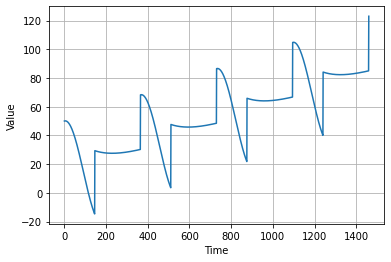

In [9]:
slope = 0.05
series = baseline + trend(time, slope)+ seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

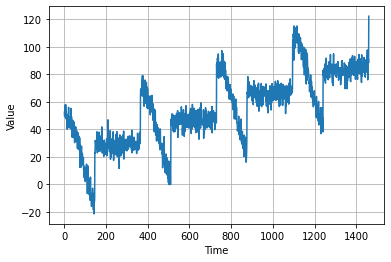

In [15]:
noise_level=5
noisy_series = series + noise(time, noise_level, seed=42)
plot_series(time, noisy_series)

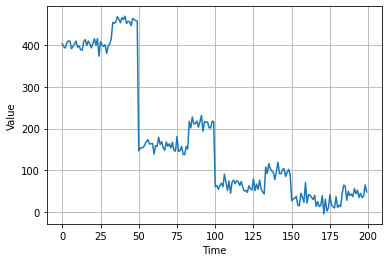

In [19]:
series = autocorrelation_1(time, 10, seed=42)
plot_series(time[:200], series[:200])
